In [6]:
import pandas as pd
import numpy as np

在pandas中，缺失数据用NaN表示

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

python内置的None值在对象数据中也可以作为NA

In [4]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

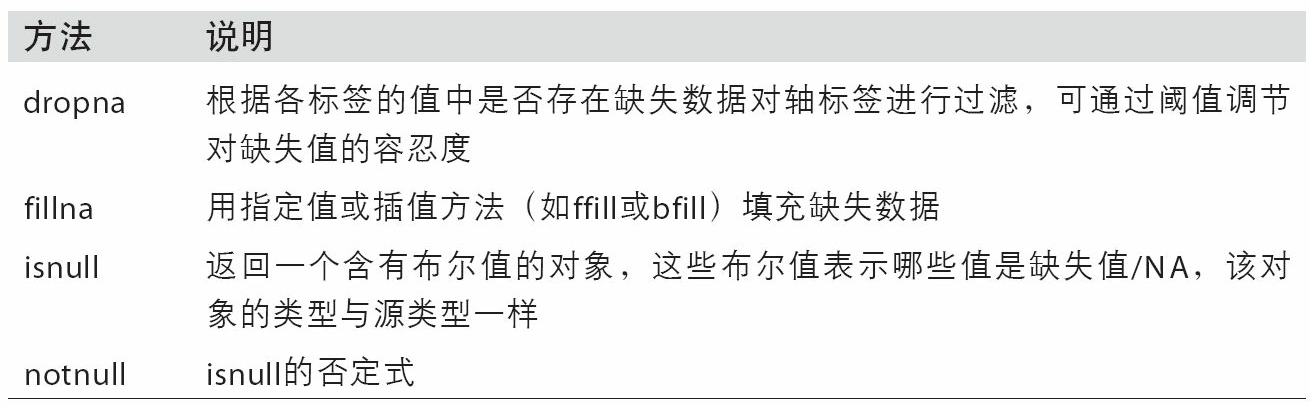

#### 滤除缺失数据

对于一个Series，dropna方法返回一个非空数据和索引值得Series

In [10]:
from numpy import nan as NA

In [9]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [10]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [12]:
data.dropna()  # 直接删除含有nan的索引和值

0    1.0
2    3.5
4    7.0
dtype: float64

In [13]:
# 于上面的等价
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

对于DataFrame就比较复杂，丢去含nan的行或列，dropna默认删除行

In [15]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])

In [16]:
cleaned = data.dropna()

In [17]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [18]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [19]:
# 传入how='all'将只丢弃全为NA的那些行
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [20]:
data[4] = NA

In [21]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [27]:
data.dropna(axis=1, how='all')  # 删除全为nan的列，具有返回值，原数据不变

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [28]:
data.dropna(how='all')  # 删除全为nan行

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


另一个滤除DaraFrame行的问题及时间序列数据，假如你只想留下一部分观测数据，可以用thresh参数实现此目的。

In [29]:
df = pd.DataFrame(np.random.randn(7, 3))

In [31]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

In [32]:
df

,0,1,2
0,0.611199,NaN,NaN
1,-0.061865,NaN,NaN
2,0.113251,NaN,-1.740397
3,1.147367,NaN,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


In [34]:
df.dropna()  # 删除含有nan的行

,0,1,2
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


In [51]:
df.dropna(thresh=2)  # 需要许多非nan值

,0,1,2
2,0.113251,NaN,-1.740397
3,1.147367,NaN,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


#### 填充缺失数据

丢弃缺失数据有能丢弃了其他跟他有关的数据，这时就需要填补nan空洞，使用fillna将缺失值替换为某个常数

In [53]:
df

,0,1,2
0,0.611199,NaN,NaN
1,-0.061865,NaN,NaN
2,0.113251,NaN,-1.740397
3,1.147367,NaN,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


In [55]:
df.fillna(0)  # 具有返回值

,0,1,2
0,0.611199,0.000000,0.000000
1,-0.061865,0.000000,0.000000
2,0.113251,0.000000,-1.740397
3,1.147367,0.000000,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


若通过一个字典调用fillna，就可以实现对不同的列填充不同的值

In [57]:
df.fillna({1: 0.5, 2: 0})  # 第一列的na值用0.5代替，第二列的na值用0代替

,0,1,2
0,0.611199,0.500000,0.000000
1,-0.061865,0.500000,0.000000
2,0.113251,0.500000,-1.740397
3,1.147367,0.500000,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


In [66]:
_ = df.fillna(0, inplace=True)  
# 就已存在的对象就行修改，即把0.5改为0

In [67]:
df

,0,1,2
0,0.611199,0.000000,0.000000
1,-0.061865,0.000000,0.000000
2,0.113251,0.000000,-1.740397
3,1.147367,0.000000,0.792193
4,0.105744,0.850073,-0.103828
5,0.414196,-0.721286,-0.748071
6,-0.539737,-0.713962,0.377659


对reindex有效的插值方法也适用于fillna

In [68]:
df = pd.DataFrame(np.random.randn(6, 3))

In [69]:
df.iloc[2:, 1] = NA

In [70]:
df.iloc[4:, 2] = NA

In [71]:
df

,0,1,2
0,0.346554,-0.999225,1.603449
1,-1.086422,-0.955649,0.238317
2,-1.849502,NaN,-0.364323
3,0.426314,NaN,-0.072528
4,-0.733877,NaN,NaN
5,0.423240,NaN,NaN


In [74]:
df.fillna(method='ffill')  #  向前填充，具有返回值

,0,1,2
0,0.346554,-0.999225,1.603449
1,-1.086422,-0.955649,0.238317
2,-1.849502,-0.955649,-0.364323
3,0.426314,-0.955649,-0.072528
4,-0.733877,-0.955649,-0.072528
5,0.423240,-0.955649,-0.072528


In [79]:
df.fillna(method='ffill', limit=2) # limit参数指定填充次数

,0,1,2
0,0.346554,-0.999225,1.603449
1,-1.086422,-0.955649,0.238317
2,-1.849502,-0.955649,-0.364323
3,0.426314,-0.955649,-0.072528
4,-0.733877,NaN,-0.072528
5,0.423240,NaN,-0.072528


实现其他功能，传入Series的平均值或中位数

In [83]:
data = pd.Series([1, NA, 3.5, NA, 7])
data.fillna(data.mean())  # 将平均值传给空白处

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

#### 数据转换

移除重复数据

In [84]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                    'k2': [1, 1, 2, 3, 3, 4, 4]})

In [85]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


DataFrame的duplicated方法返回一个布尔型series，表示各行是否有重复（前面出现过的行）

In [86]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [89]:
# 删除重复行的drop_duplicates(),具有返回值, 默认判断全部行
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [90]:
data['v1'] = range(7)

In [93]:
# 指定部分列进行重复项判断
data.drop_duplicates(['k1']) 

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated和drop_duplicates默认保留的是第一个出现的组合，传入keep='last'则保留最后一个

In [94]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


利用函数或映射进行数据转换

根据Series或DataFrame列中的值来实现转换

In [95]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 
                             'honey ham', 'nova lox'], 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [96]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [97]:
# 添加一列表示该肉类食物来源的动物类型，先编写一个不同肉类到动物的映射
meat_to_animal = {'bacon': 'pig', 
                 'pulled pork': 'pig',
                 'pastrami': 'cow',
                 'corned beef': 'cow',
                 'honey ham': 'pig',
                 'nova lox': 'salmon'}

series的map方法可以接受一个函数或映射关系的字典对象，再用str.low()方法将各值转换为小写

In [109]:
# 将food列转换为小写
lowercased = data['food'].str.lower()

###### lowercased

In [105]:
data['animal'] = lowercased.map(meat_to_animal)

In [106]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [107]:
# 自己使用匿名函数完成这些任务
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

替换值

fillna方法为填充缺失数据的一种特殊情况，map可用于修改对象的数据子集，而replace则提供了一种实现该功能的更简单、更灵活的方式

In [110]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [111]:
# 将-999转换为能够理解的表示数据缺失的标记值
data.replace(-999, NA)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [112]:
# 传入一个列表，一次性替换多个值
data.replace([-999, -1000], NA)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [114]:
# 让每个值有不同的替换值，则传递一个列表
data.replace([-999, -1000], [NA, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [115]:
# replace传入的参数也可以是字典
data.replace({-999: NA, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

注意:data.replace方法和data.str.replace不同，后者是字符串的元素级替换

重命名轴索引

轴标签可以通过函数或映射进行转换，轴还可以就地修改

In [117]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                   index=['Ohio', 'Colorado', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [118]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [119]:
transform = lambda x: x[:4].upper()

In [122]:
data.index.map(transform)  # 将索引转换为大写

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [124]:
# 将其赋值给数据的索引就可以就地修改
data.index = data.index.map(transform)

In [125]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [133]:
# 如果想要创建数据集的转换版（而不是修改原始数据数据），rename比较实用
data.rename(index=str.title, columns=str.upper)  # title仅首字母大写

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [134]:
# rename可以结合字典型对象实现对部分轴标签的更新
data.rename(index={'OHIO': 'INDIANA'}, columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [135]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


离散化和面元划分

In [4]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

连续数据离散化或拆分为“面元 bin”

In [7]:
# 将数据划分为18到25、26到35、35到60、以及60以上的几个面元，使用
# pandas的cut函数
bins = [18, 25, 35, 60, 100]

In [11]:
cats = pd.cut(ages, bins)

In [12]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [13]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [15]:
cats.categories  #分类类别

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [16]:
# 显示每个类别的数量
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [19]:
# 设置类别区间开闭
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [20]:
# 传递一个列表或数组到labels，设置面元名称
groyp_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [21]:
pd.cut(ages, bins, labels=groyp_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

传入面元的数量而不是确切的面元边界，根据数据的最大值和最小值计算等长面元

In [22]:
data = np.random.randn(20)

In [28]:
pd.cut(data, 4, precision=2)  # precision表示精度，两位小数

[(-0.15, 0.79], (-0.15, 0.79], (0.79, 1.74], (-1.1, -0.15], (-0.15, 0.79], ..., (0.79, 1.74], (-1.1, -0.15], (-1.1, -0.15], (-2.05, -1.1], (-1.1, -0.15]]
Length: 20
Categories (4, interval[float64]): [(-2.05, -1.1] < (-1.1, -0.15] < (-0.15, 0.79] < (0.79, 1.74]]

qcut 根据样本分位数进行面元划分，得到大小基本相等的面元，cut可能无法使各个面元中含有相同数量的数据点

In [36]:
data = np.random.randn(1000)  # 正太分布的数据

In [40]:
cats = pd.qcut(data, 4)  # 切成四分位数

In [41]:
cats

[(-0.611, -0.00268], (-2.92, -0.611], (0.663, 3.14], (0.663, 3.14], (0.663, 3.14], ..., (-0.611, -0.00268], (-0.611, -0.00268], (0.663, 3.14], (0.663, 3.14], (0.663, 3.14]]
Length: 1000
Categories (4, interval[float64]): [(-2.92, -0.611] < (-0.611, -0.00268] < (-0.00268, 0.663] < (0.663, 3.14]]

In [42]:
pd.value_counts(cats)

(0.663, 3.14]         250
(-0.00268, 0.663]     250
(-0.611, -0.00268]    250
(-2.92, -0.611]       250
dtype: int64

In [43]:
# 传入自定义的分位数（0-1之间，包含端点）
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.217, -0.00268], (-1.217, -0.00268], (-0.00268, 1.286], (1.286, 3.14], (-0.00268, 1.286], ..., (-1.217, -0.00268], (-1.217, -0.00268], (-0.00268, 1.286], (1.286, 3.14], (1.286, 3.14]]
Length: 1000
Categories (4, interval[float64]): [(-2.92, -1.217] < (-1.217, -0.00268] < (-0.00268, 1.286] < (1.286, 3.14]]

检测和过滤异常值

In [44]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [45]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.033917,-0.038383,0.026568,0.048609
std,1.012054,0.983974,1.038235,0.985354
min,-3.165499,-2.867330,-2.982622,-2.826237
25%,-0.673094,-0.721941,-0.697403,-0.639263
50%,0.043182,-0.094335,0.003871,0.018097
75%,0.718373,0.632347,0.746814,0.709261
max,3.371357,3.266638,3.167007,2.998668


In [47]:
col = data[2]

In [49]:
col[np.abs(col) > 3]  # 第三列绝对值大于3的值

846    3.167007
Name: 2, dtype: float64

In [55]:
# 选出含有值大于3或小于-3的值得行，使用any方法
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
204,3.371357,-1.071472,-0.181916,-0.162694
311,-3.165499,0.679728,-0.689439,0.062202
822,-0.147694,3.266638,-0.076389,-0.176490
846,-1.011957,-1.795280,3.167007,-0.101801


In [59]:
# 对值进行设置，限制在-3到3以内
data[np.abs(data) > 3] = np.sign(data) * 3  # 将绝对值大于3的正负数设置为1和-1

In [60]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.033711,-0.038649,0.026401,0.048609
std,1.010385,0.983113,1.037743,0.985354
min,-3.000000,-2.867330,-2.982622,-2.826237
25%,-0.673094,-0.721941,-0.697403,-0.639263
50%,0.043182,-0.094335,0.003871,0.018097
75%,0.718373,0.632347,0.746814,0.709261
max,3.000000,3.000000,3.000000,2.998668


In [61]:
# 根据数据的值是正还是负，np.sign(data)可以生成1和-1
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,1.0
2,1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,-1.0
4,-1.0,1.0,-1.0,-1.0


排列和随机采样

In [63]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [67]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [78]:
# 通过需要排列的轴的长度调用permutation，产生一个表示新序列的整数数组
sampler = np.random.permutation(5)

In [79]:
sampler

array([3, 1, 0, 4, 2])

In [80]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [82]:
df.iloc[sampler]  # 根据上面的随机排序显示

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19
2,8,9,10,11


In [97]:
# 如果不想用替换的方式选取随机子集，可以在Series和DataFrame上使用sample方法
df.sample(n=3)  # 随机选取3行，

,0,1,2,3
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


In [100]:
# 要通过替换的方式产生样本（允许重复），可以传递replace=True到sample
choices = pd.Series([5, 7, -1, 6, 4])

In [110]:
draws = choices.sample(n=10, replace=True)

In [111]:
draws

3    6
0    5
3    6
4    4
3    6
0    5
3    6
0    5
4    4
0    5
dtype: int64

计算指标/哑变量

一种常用于统计建模或机器学习的转换方式是：将分类变量转换（categorical variable）为‘哑变量’或‘指标矩阵’

如果DataFrame的某一列含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（值为0或1）。pandas有一个get_dummies函数可以实现

In [7]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 
                  'data1': range(6)})

In [117]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [124]:
pd.get_dummies(df['key'])  # key有三个不同的值，则产生abc三列矩阵

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [143]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [144]:
df_with_dummy = df[['data1']].join(dummies)  
# df[['data1']]表示一个DataFrame

In [145]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [8]:
df[['data1']]  # 是一个DataFrame类型

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [20]:
# 如果DataFrame的某行同属于多个分类，则比较复杂

In [36]:
movies = pd.DataFrame({'movie_id': np.arange(1,11),
                      'title': ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)'],
                      'genres': ['Animation|Children"s|Comedy', 'Adventure|Children"s|Fantasy', 'Comedy|Romance', 'Comedy|Drama', 'Comedy', 'Action|Crime|Thriller', 'Comedy|Romance', 'Adventure|Children"s', 'Horror|Sci-Fi|Documentary|War|Musical|Mystery|Film-Noir|Western', 'Action|Adventure|Thriller']})

In [37]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),"Animation|Children""s|Comedy"
1,2,Jumanji (1995),"Adventure|Children""s|Fantasy"
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),"Adventure|Children""s"
8,9,Sudden Death (1995),Horror|Sci-Fi|Documentary|War|Musical|Mystery|...
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [38]:
# 从数据集中抽取出不同的genres值
all_genres = list()
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [39]:
genres

array(['Animation', 'Children"s', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [47]:
# 构造指标DataFrame的方法之一是从一个全零的DataFrame开始
zero_matrix = np.zeros((len(movies), len(genres)))

In [48]:
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [53]:
# 现在迭代每一部电影，并将dummies各行的条目设为1.
# 使用dummies.columns计算每个类型的列索引

In [58]:
gen = movies['genres'][0]  # 或者gen = movies.genres[0]

In [60]:
gen.split('|')

['Animation', 'Children"s', 'Comedy']

In [61]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [62]:
# 根据索引，使用iloc设定值
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [63]:
for i, gen in enumerate(movies.genres):
    print(i, gen)

0 Animation|Children"s|Comedy
1 Adventure|Children"s|Fantasy
2 Comedy|Romance
3 Comedy|Drama
4 Comedy
5 Action|Crime|Thriller
6 Comedy|Romance
7 Adventure|Children"s
8 Horror|Sci-Fi|Documentary|War|Musical|Mystery|Film-Noir|Western
9 Action|Adventure|Thriller


In [65]:
# 再将其与movies合并起来
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children"s|Comedy
Genre_Animation                                1
Genre_Children"s                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

注意：对于很大的数据，用这种方式构建多成员指标变量就会变得非常慢。最好使用低级函数，将其写入numpy数组，然后结果包装在DataFrame中

一个对统计应用有用的秘诀：结合get_dummies和诸如cut之类的离散化函数

In [66]:
np.random.seed(12345)

In [67]:
values = np.random.rand(10)

In [68]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [69]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [72]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


#### 字符串操作

对于字符串处理和脚本应用，内置字符串方法split拆分数据段

In [73]:
val = 'a,b, guido'

In [77]:
val.split(',')  # 返回列表

['a', 'b', ' guido']

In [78]:
# split常常和strip一起使用，以去除空白符（包括换行符）
pieces = [x.strip() for x in val.split(',')]

In [79]:
pieces

['a', 'b', 'guido']

In [81]:
# 向字符串::的join方法传入一个列表或元组 ，实现连接
'::'.join(pieces)

'a::b::guido'

In [92]:
val

'a,b, guido'

In [101]:
val.find(':')  # 索引不存在时返回-1

-1

In [103]:
# replace用于将指定模式替换为另一个模式，可以传入空字符串用于删除模式
val.replace(',', '::')  # 将，替换为::

'a::b:: guido'

In [109]:
val.replace(',', '')

'ab guido'

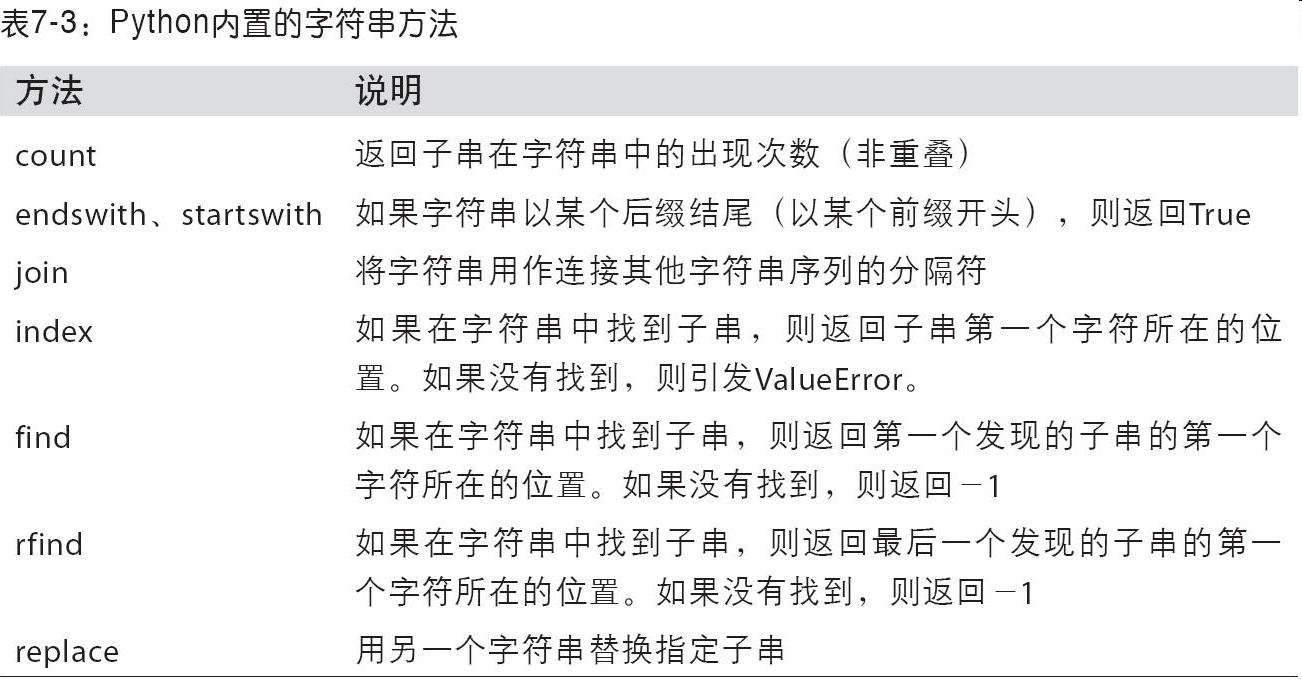

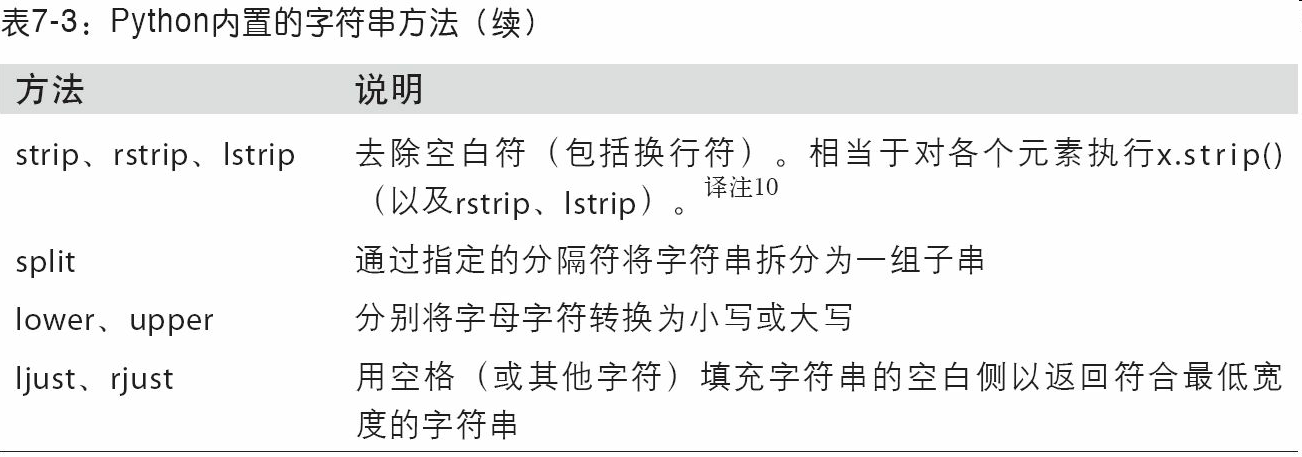

##### 正则表达式（regex）

In [111]:
import re

In [112]:
text = "foo    bar\t baz  \tqux"

In [116]:
re.split('\s+', text)  # 描述一个或多个空白符是\s+

['foo', 'bar', 'baz', 'qux']

In [114]:
# 用re.compile自己编译得到一个可以重用的regex对象
regex = re.compile('\s+')

In [115]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [117]:
# 如果只希望得到匹配regex的所有模式，则可以使用findall方法
regex.findall(text)

['    ', '\t ', '  \t']

注意：如果对多个字符串使用同一条正则表达式，建议通过re.compile创建regex对象，可以节省大量CPU时间

findall返回的是字符串中所有的匹配项，search值返回第一个匹配项，match只匹配字符串的首部

In [118]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [130]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [120]:
# re.IGNORECASE 使正则表达式不区分大小写
regex = re.compile(pattern, flags=re.IGNORECASE)

In [121]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [124]:
m = regex.search(text)  # 返回模式在原字符串中的起始和结束位置
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [125]:
text[m.start():m.end()]

'dave@google.com'

In [127]:
print(regex.match(text))  # 只匹配出现在字符串开头的模式

None


In [129]:
# sub方法可以将匹配到的模式替换为指定字符串，并饭回所得到的新字符串
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [ ]:
# 将得到的电子邮件地址分成3个部分：用户名、域名、域名后缀，用括号将待分段的模式包起来


In [131]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [132]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [133]:
m = regex.match('wesm@bright.net')

In [134]:
m.groups()

('wesm', 'bright', 'net')

In [140]:
regex.findall(text)  # 以元组列表的形式返回，带有分组功能

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [141]:
# sub还能通过\1 \2之类的特殊符号访问各匹配项中的分组，
# 分别对应第一个、第二个分组，以此类推

In [144]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



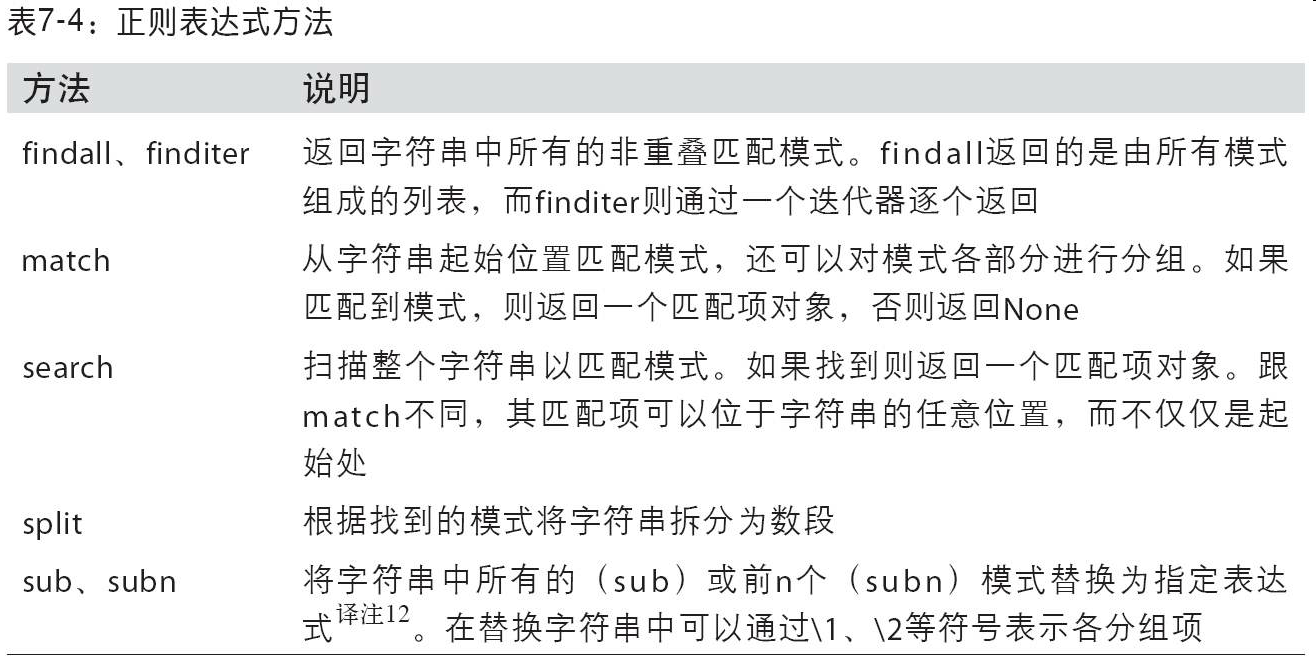

#### pandas的矢量化字符串函数

In [145]:
data = {'Dave': 'dave@goole.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [148]:
data = pd.Series(data)
data

Dave      dave@goole.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

通过data.map,所有字符串和正则表达式方法都能被应用于（传入lambda表达式或其他函数）各个值，如果存在NA（null）就会报错。

Series有一些能跳过NA值得面向数组方法，进行字符串操作。通过Series的str属性即可访问这些方法

In [150]:
data.str.contains('gmail')  # 查看是否含gmail

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [151]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [152]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave      [(dave, goole, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

有两个办法可以实现矢量化的元素获取操作: str.get 或者 在str属性上使用索引

In [153]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [154]:
# 要访问嵌入列表中的元素，可以传递索引到这两个函数中

In [155]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [163]:
matches.str[1]

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [164]:
# 利用这种方法对字符串进行截取
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

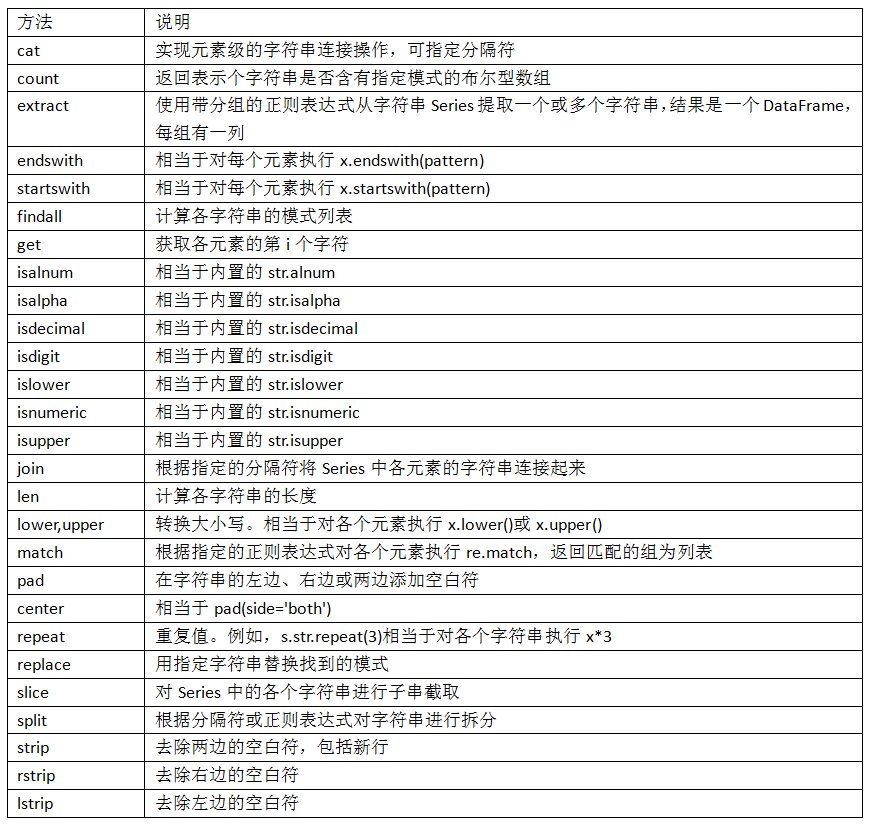

In [165]:
data.str